# Exploratory Data Analysis

[Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
# Modules
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
# Data Import
with zipfile.ZipFile('../Data/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data')

df = pd.read_csv('../Data/housing.csv')
df.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Pair Plotting
- Used data wrangler to view distributions of single variables
- Some missing data in bedrooms category
- All numeric except ocean proximity which is categorical - needs one hot encoded

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Do pairs plots

<Figure size 400x400 with 0 Axes>

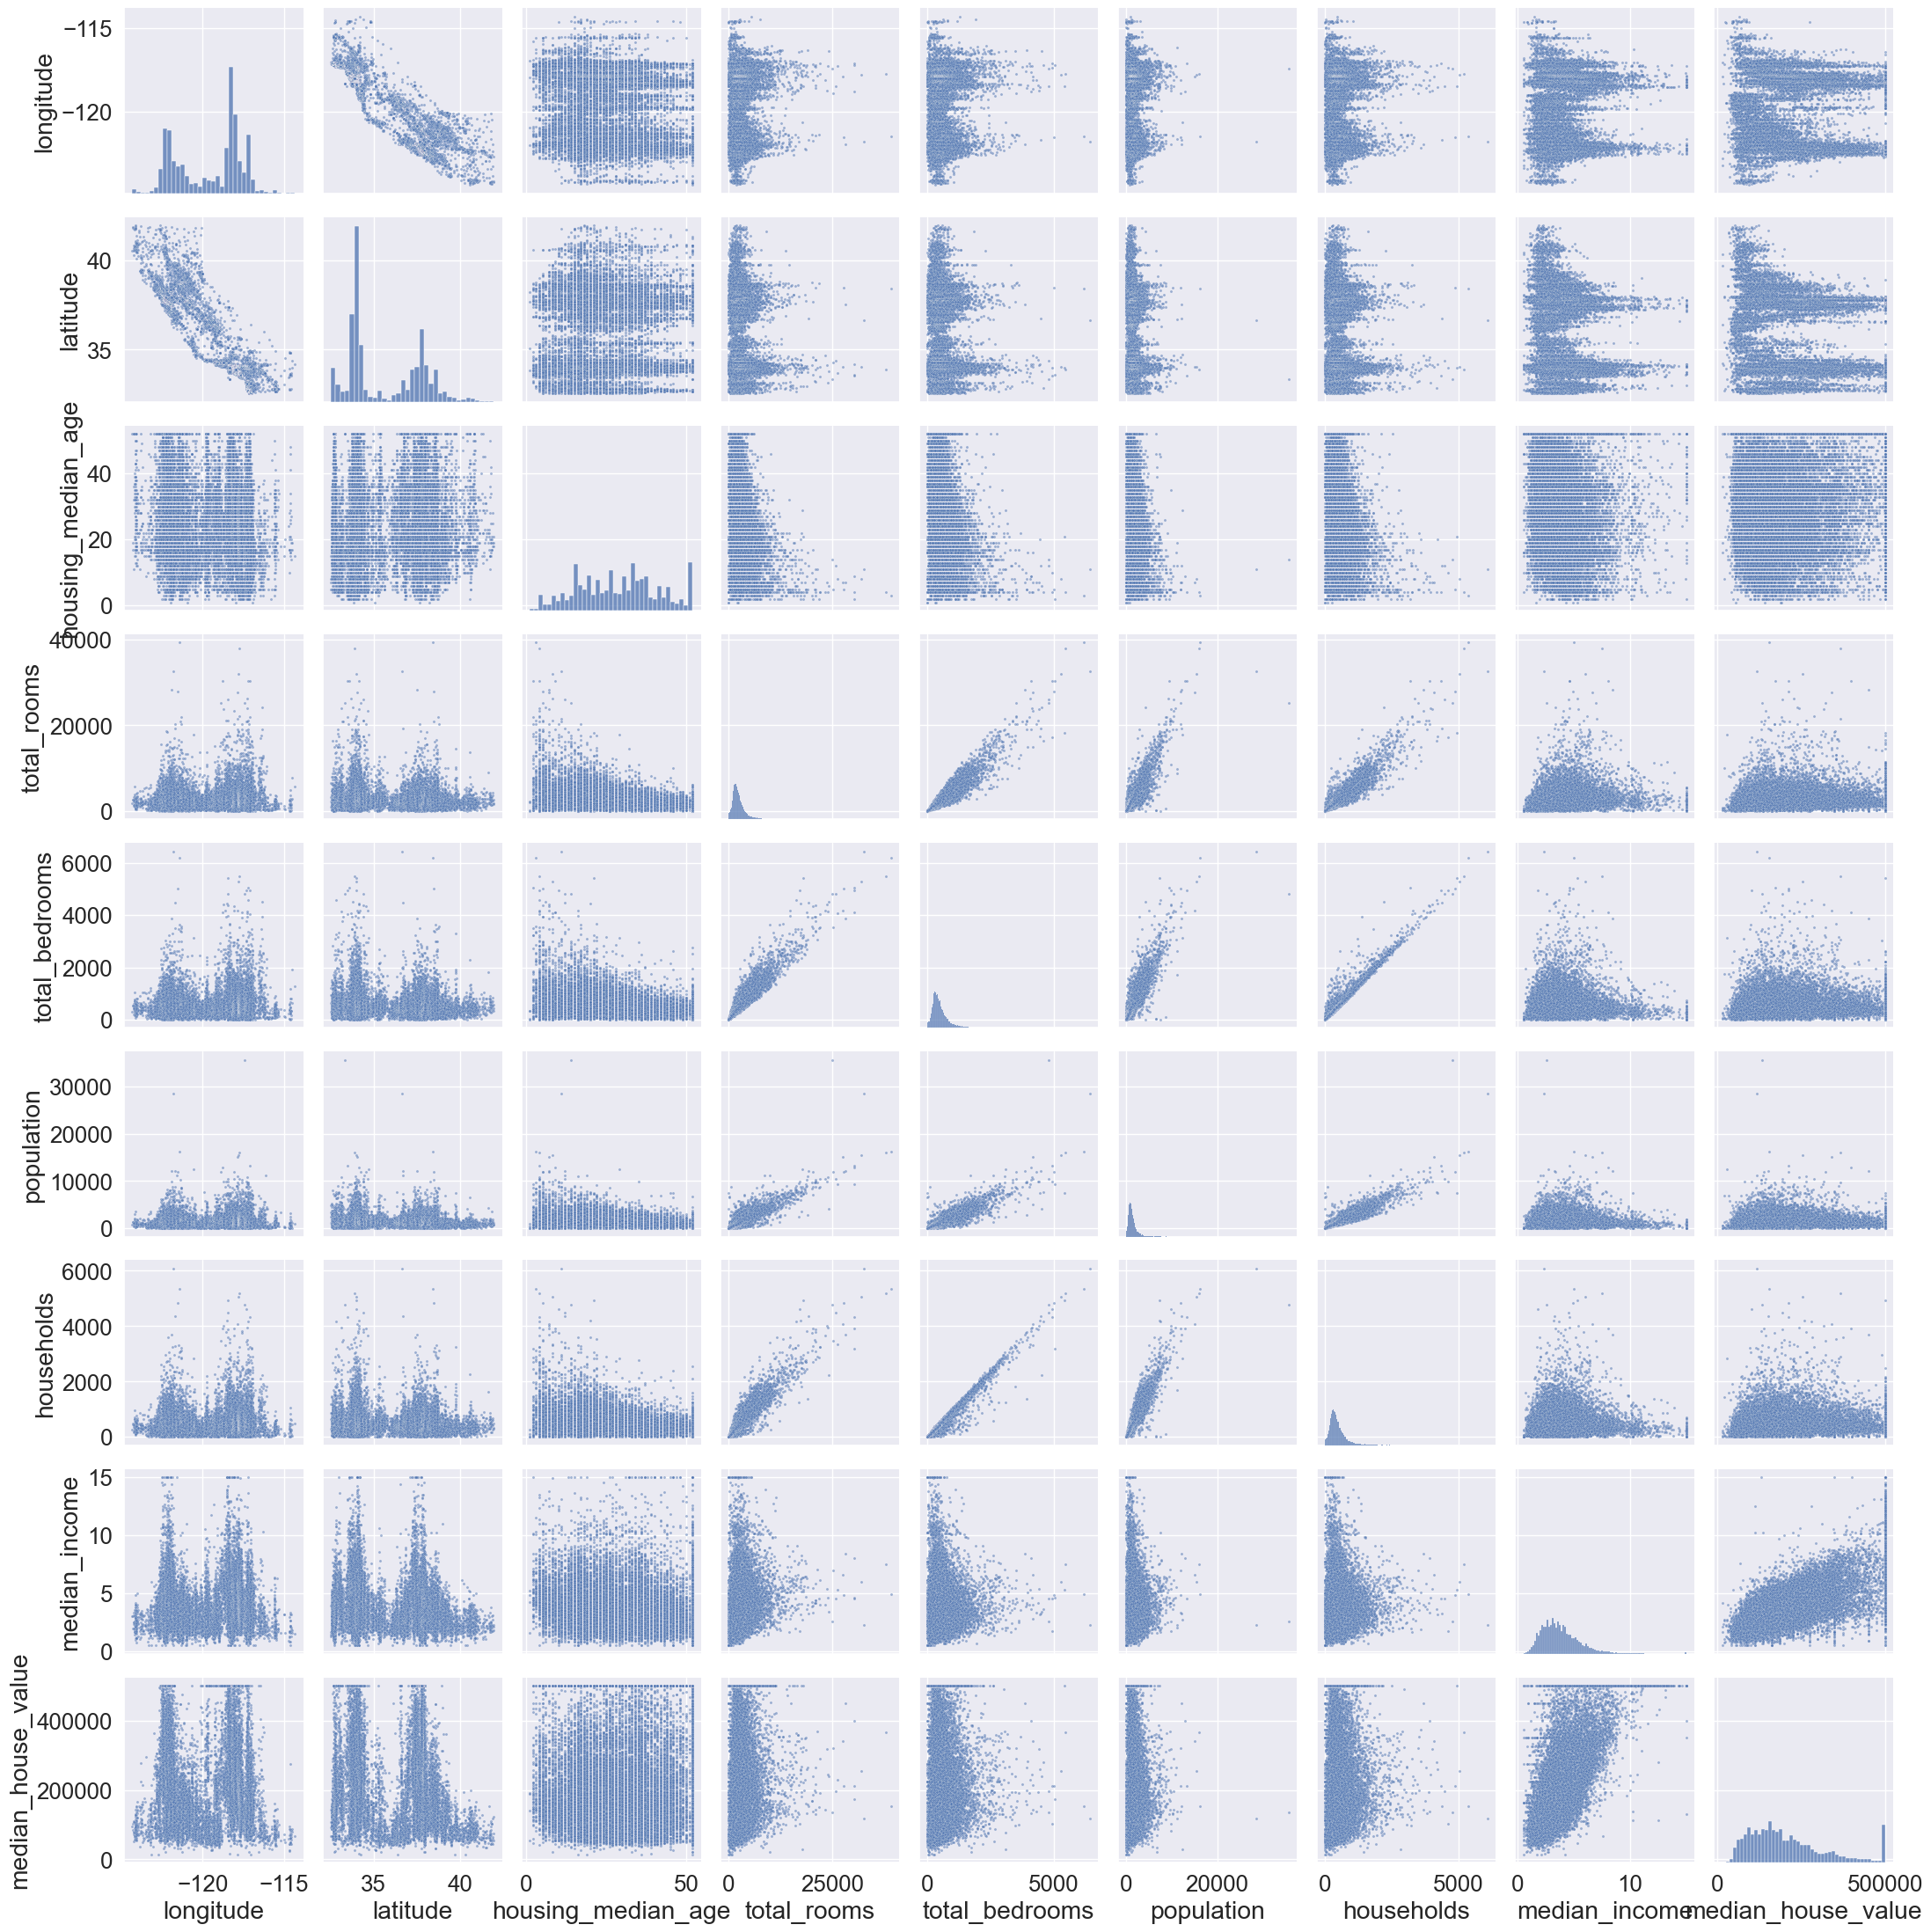

In [4]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.7)
sns.pairplot(df, plot_kws={'alpha':0.5, 's':5})
plt.show()

- Median house value caps out at $500,000
- House median age caps out at 52
- Outlier of 15 in median income
- Note all data is a median of all households within that block, households column gives number of homes in that block
- Households has a long thin tail, is near normal in log space

In [5]:
print('Blocks with over 4000 households:', (df['households']>4000).sum())
print('Blocks with median house price over $500,000:', (df['median_house_value']>=500000).sum(), (df['median_house_value']>=500000).sum()/df.shape[0]*100)
print('blocks with median housing age over 52:', (df['housing_median_age']>=52).sum(), (df['housing_median_age']>=52).sum()/df.shape[0]*100)

Blocks with over 4000 households: 15
Blocks with median house price over $500,000: 992 4.8062015503875966
blocks with median housing age over 52: 1273 6.167635658914729


<Axes: xlabel='housing_median_age', ylabel='Count'>

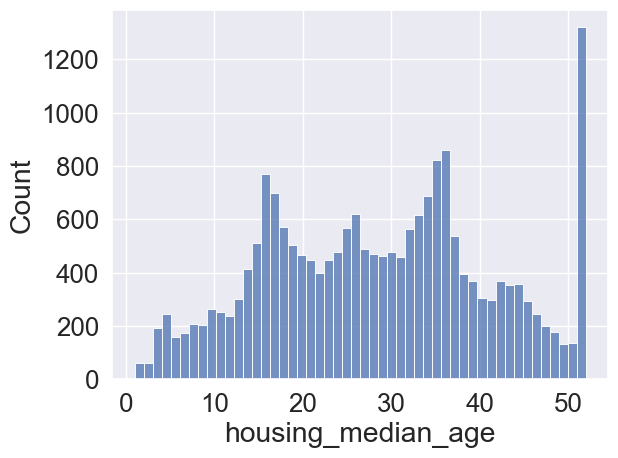

In [6]:
sns.histplot(df['housing_median_age'], bins=50, kde=False)


<Axes: xlabel='median_income', ylabel='Count'>

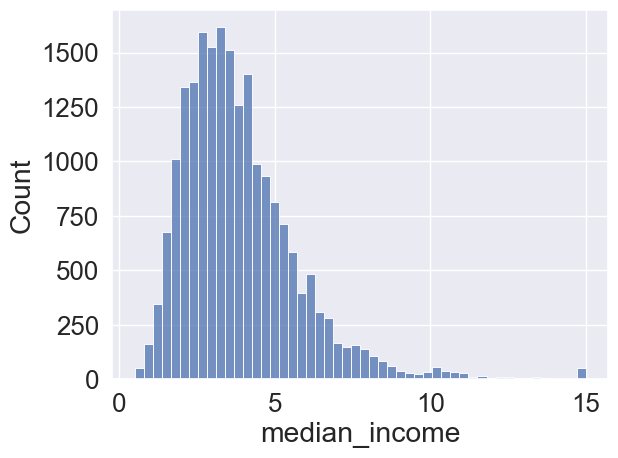

In [7]:
sns.histplot(df['median_income'], bins=50, kde=False)

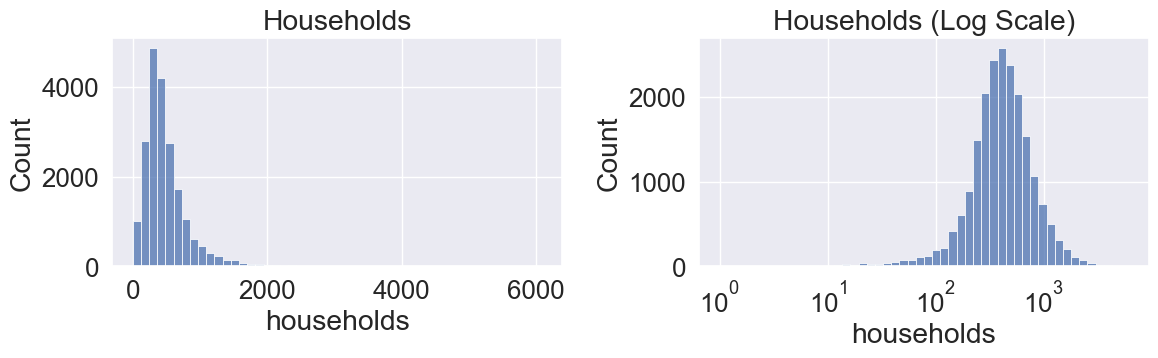

In [8]:
#sns.histplot(df['households'], bins=50, kde=False)
#sns.histplot(df['households'], bins=50, kde=False, log_scale=True)

# Plot two histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['households'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Households')

sns.histplot(df['households'], bins=50, kde=False, log_scale=True, ax=axes[1])
axes[1].set_title('Households (Log Scale)')

plt.tight_layout()
plt.show()

## Geographic Plots

In [11]:
import plotly.express as px

#fig = go.Figure(data = go.Scattergeo(lon = df['longitude'], lat = df['latitude'],))
#fig = px.scatter_map(df, lat="latitude", lon="longitude", color="median_house_value")

#fig.update_layout(
#    mapbox_style="open-street-map",
#    margin={"r":0,"t":0,"l":0,"b":0})

#fig.show()

for i in range(0, df.shape[1]):
    col = df.columns[i]

    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    else:

        vmin = df[col].quantile(0.01)
        vmax = df[col].quantile(0.99)

    fig = px.scatter_map(df, lat="latitude", lon="longitude", color=col, range_color=[vmin, vmax], color_continuous_scale='Blues')
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()